In [1]:
import numpy as np
from ripser import ripser
from persim import plot_diagrams
import matplotlib.pyplot as plt
from persim import plot_diagrams
from ripser import ripser, lower_star_img 
from skimage import io
from skimage import feature


(283, 200, 4)


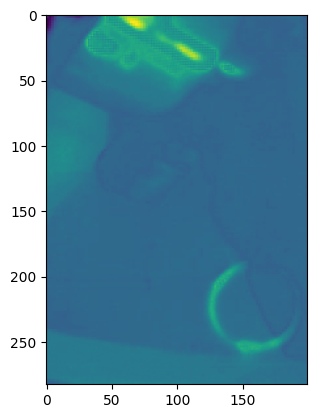

In [2]:
image1 = io.imread("wyciek.png")
image2 = io.imread("bezwycieku.png")

print(image1.shape)

image1 = image1[:,:,0]
image2 = image2[:,:,0]

obrazy = [image1,image2]

plt.imshow(image2)

In [3]:
edges = []
sigma = [0, 0.2]
for img in obrazy:
    for s in sigma:
        edges.append(feature.canny(img, sigma = s))

(283, 200)
(283, 200)
(283, 200)
(283, 200)


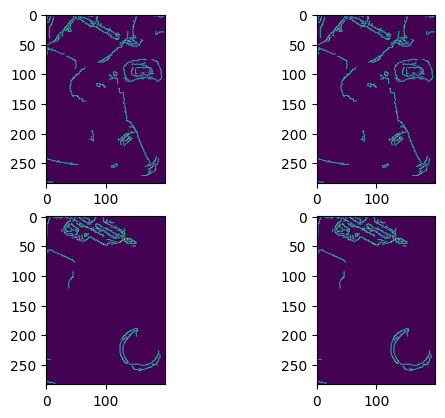

In [4]:
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    print(edges[i].shape)
    ax.imshow(edges[i])

1000
1000
1000
1000


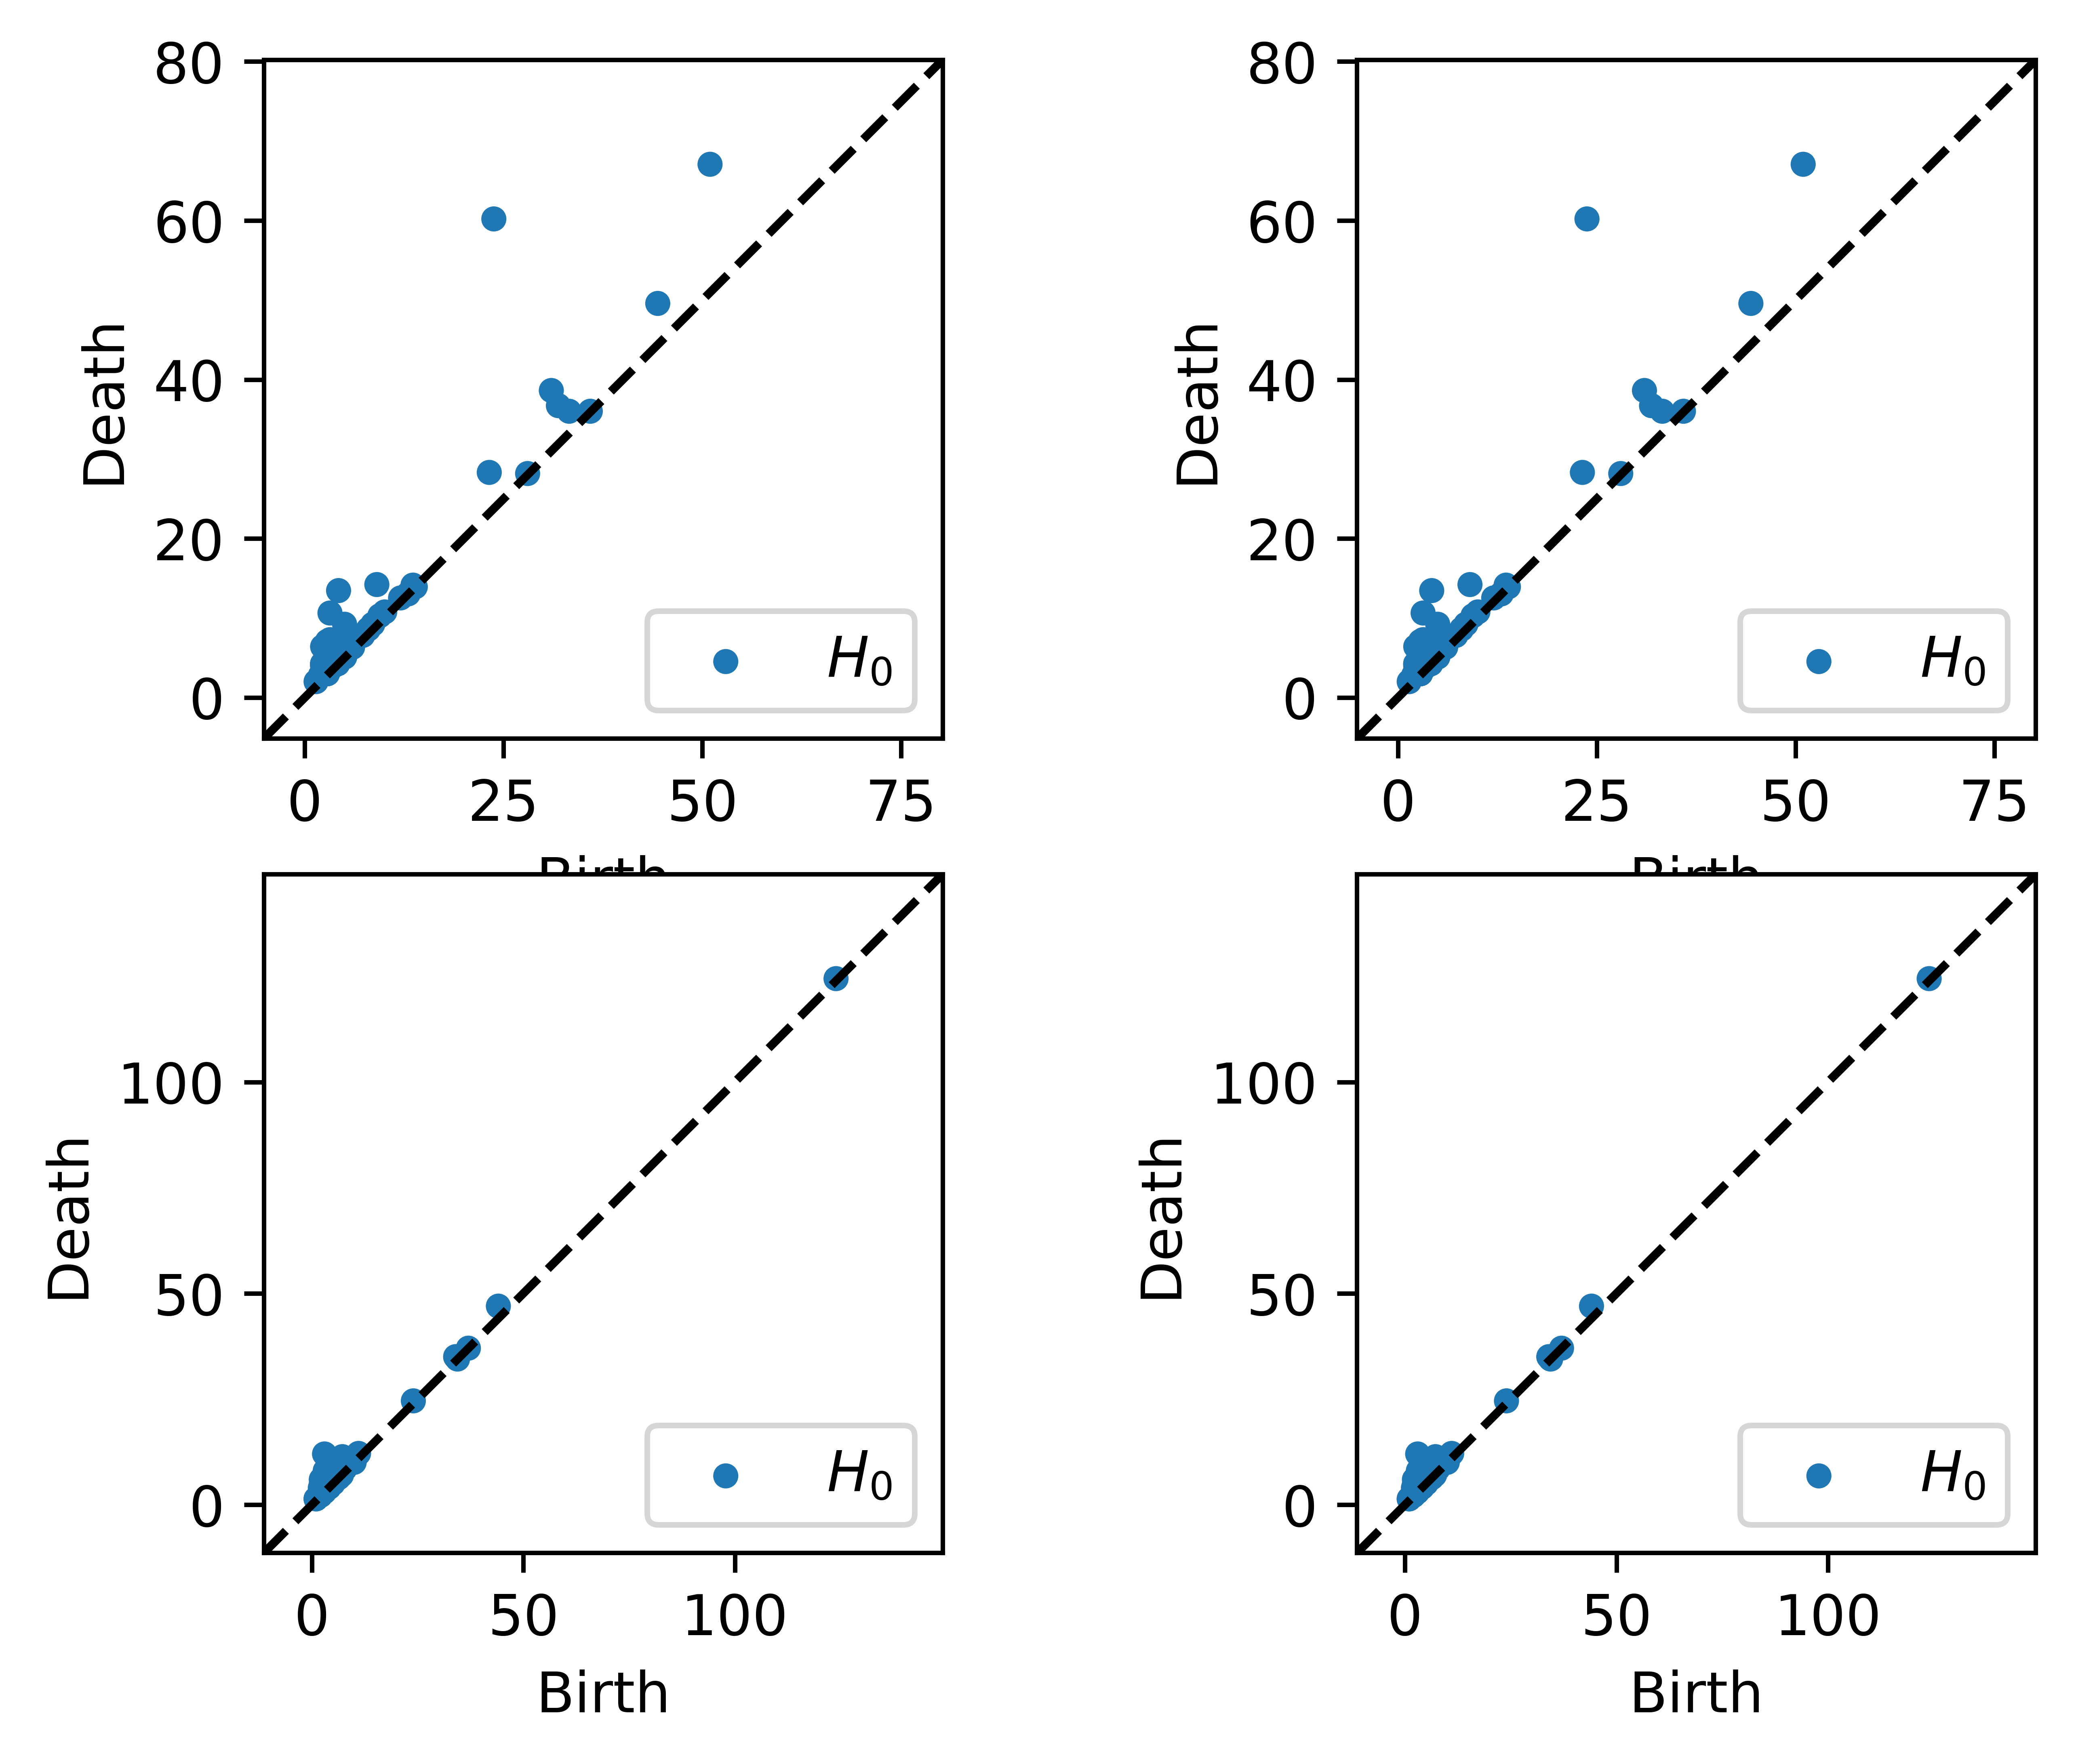

In [5]:
def make_diagram(img):
    coords = np.nonzero(img)  
    coords = [(y,x) for y,x in zip(coords[0], coords[1]) ]
    coords = np.array(coords)
    
    num = min(1000, coords.shape[0])
    print(num)
    if num != 0:
        res = ripser(coords, n_perm=num, thresh=400.0)
        dgms_sub = res['dgms']
    else:
        dgms_sub = False
    return dgms_sub

diagrams = [make_diagram(edge) for edge in edges]
plt.figure(dpi = 1000)
for i in range(4):
    plt.subplot(2,2, i+1)
    plot_diagrams(diagrams[i][1])
    



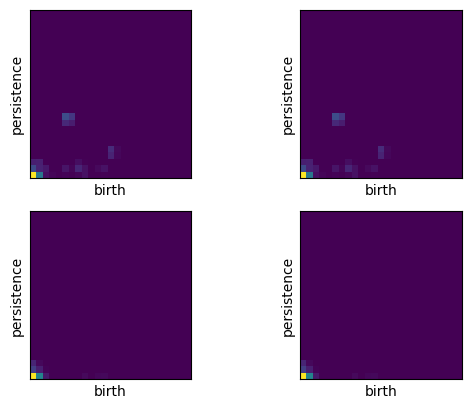

In [8]:
from persim import PersistenceImager
pimgr = PersistenceImager(pixel_size=4, pers_range=(0.0, 104.0),birth_range=(0.0, 100.0))
for i, d in enumerate(diagrams):
    ax = plt.subplot(2, 2 ,i+1)
    imgs = pimgr.transform(d[1])
    pimgr.plot_image(imgs, ax)
    if i == 0:
        plt.imsave('obraz_wyciek1.png', imgs)
    if i == 1:
        plt.imsave('obraz_wyciek2.png',imgs )
    if i == 2:
        plt.imsave('obraz_bezwycieku1.png',imgs )
    if i == 3:
        plt.imsave('obraz_bezwycieku2.png', imgs)
    
    

    

[[50.96076965332031, 67.08203887939453], [44.384681701660156, 49.57822036743164], [35.902645111083984, 36.013885498046875], [33.241539001464844, 36.013885498046875], [31.890438079833984, 36.715118408203125], [31.0, 38.62641525268555], [28.017850875854492, 28.17800521850586], [23.76972770690918, 60.20797348022461], [23.194826126098633, 28.319604873657227], [13.892443656921387, 13.928388595581055], [13.601470947265625, 13.928388595581055], [13.601470947265625, 14.142135620117188], [13.0, 13.03840446472168], [12.041594505310059, 12.529964447021484], [10.049875259399414, 10.770329475402832], [9.433980941772461, 10.29563045501709], [9.05538558959961, 14.21267032623291], [8.5440034866333, 9.219544410705566], [8.0, 8.602325439453125], [7.280109882354736, 7.8102498054504395], [6.082762718200684, 7.0], [6.0, 6.324555397033691], [5.385164737701416, 8.0], [5.385164737701416, 6.0], [5.099019527435303, 6.324555397033691], [5.099019527435303, 5.385164737701416], [5.099019527435303, 6.708203792572021

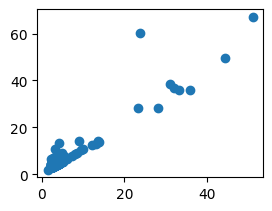

In [7]:
plt.subplot(2, 2, 1)
d = [[x, y] for x, y in diagrams[0][1]]
d_x = [x[0] for x in d]
d_y = [y[1] for y in d]
print(d)
plt.scatter(d_x, d_y)
#plik = plot_diagrams(diagrams[0][1])
plt.show()
#plt.imsave("diagram_wyciek.png", plik)